In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("mnist_train.csv");
print(df.shape)
df.head(n=3);
print(type(df))

(42000, 785)
<class 'pandas.core.frame.DataFrame'>


In [4]:
#data extraction --> extract x and y form data frame df
data=df.values
print(type(data));
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

<class 'numpy.ndarray'>
(42000, 784) (42000,)


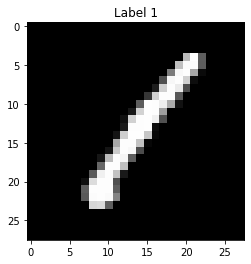

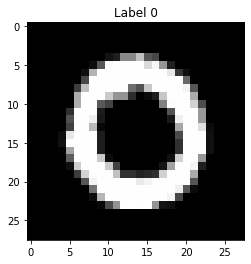

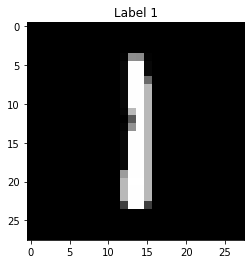

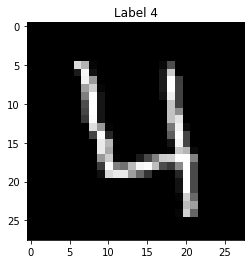

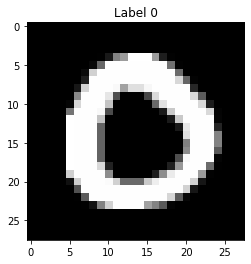

In [5]:
#Data Visualization
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title("Label " + str(Y[i]) )
    plt.show();
    
for i in range(5):
    drawImg(X,Y,i);


In [6]:

split=int(0.8*data.shape[0])

X_train=data[:split,1:]
X_test=data[split:,1:]

Y_train=data[:split,0];
Y_test=data[split:,0];

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


(33600, 784) (8400, 784)
(33600,) (8400,)


In [7]:
# Apply KNN to this data
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2));

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

7
7


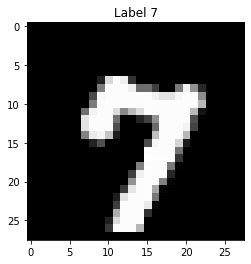

In [8]:
# Make Predictions
pred=knn(X_train,Y_train,X_test[1])
print(int(pred))
print(Y_test[1])
drawImg(X_test,Y_test,1)
